First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wor

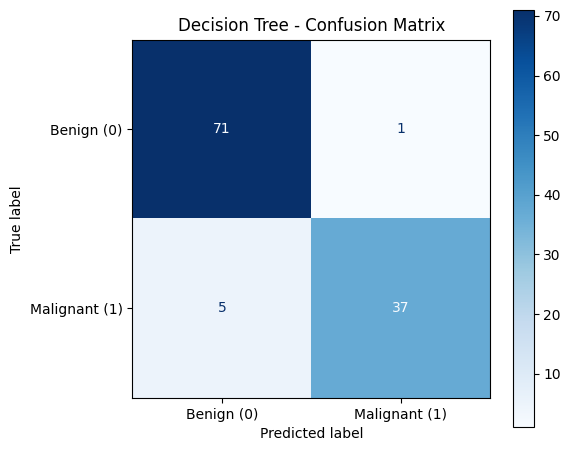

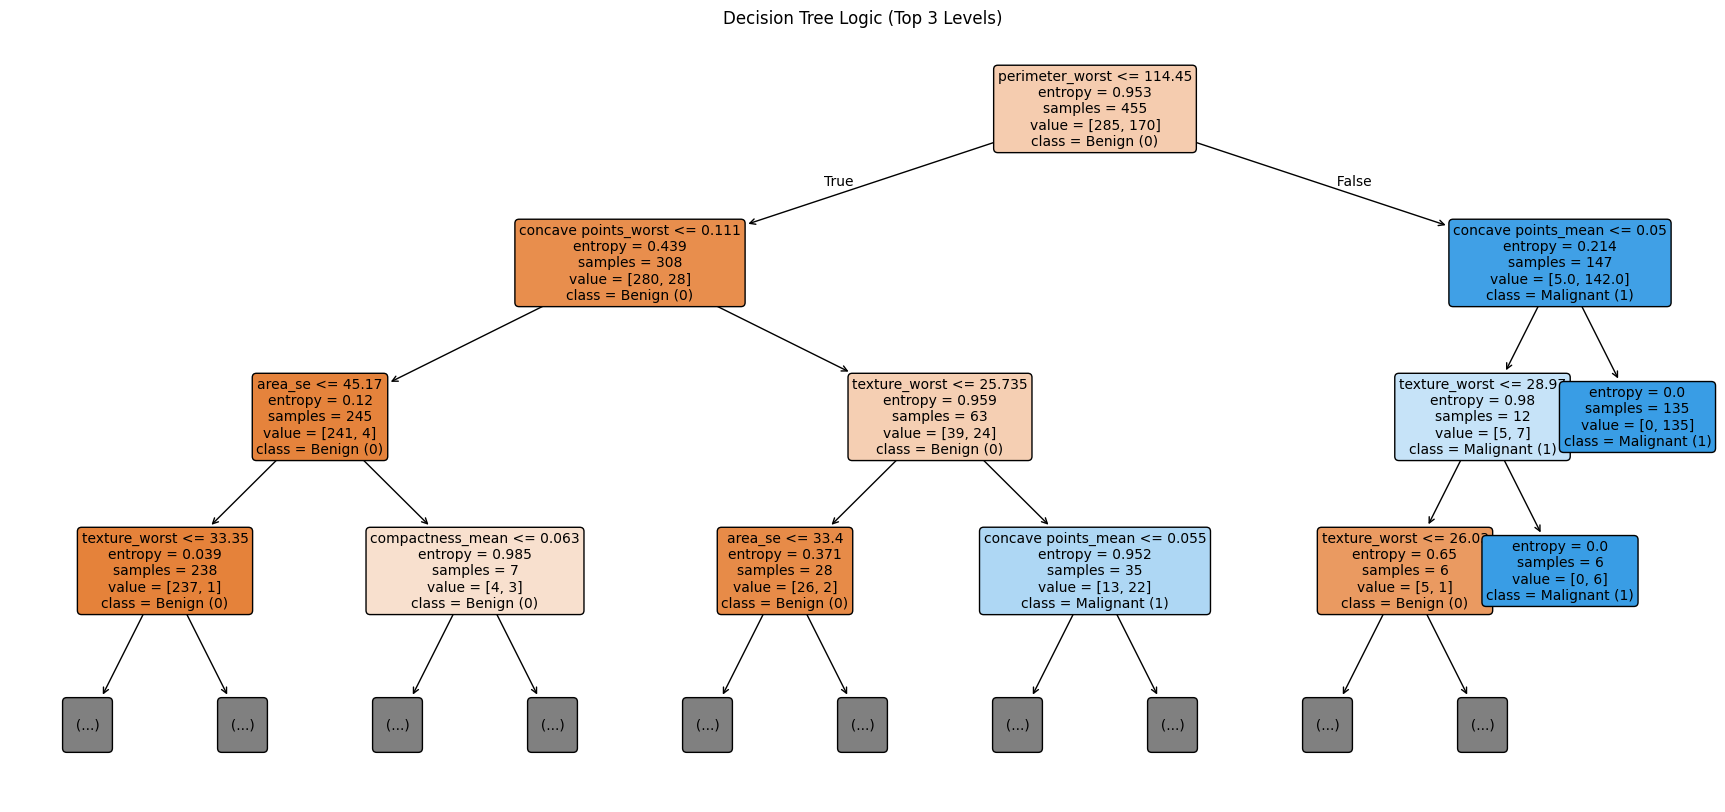

/tmp/ipython-input-504642648.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')


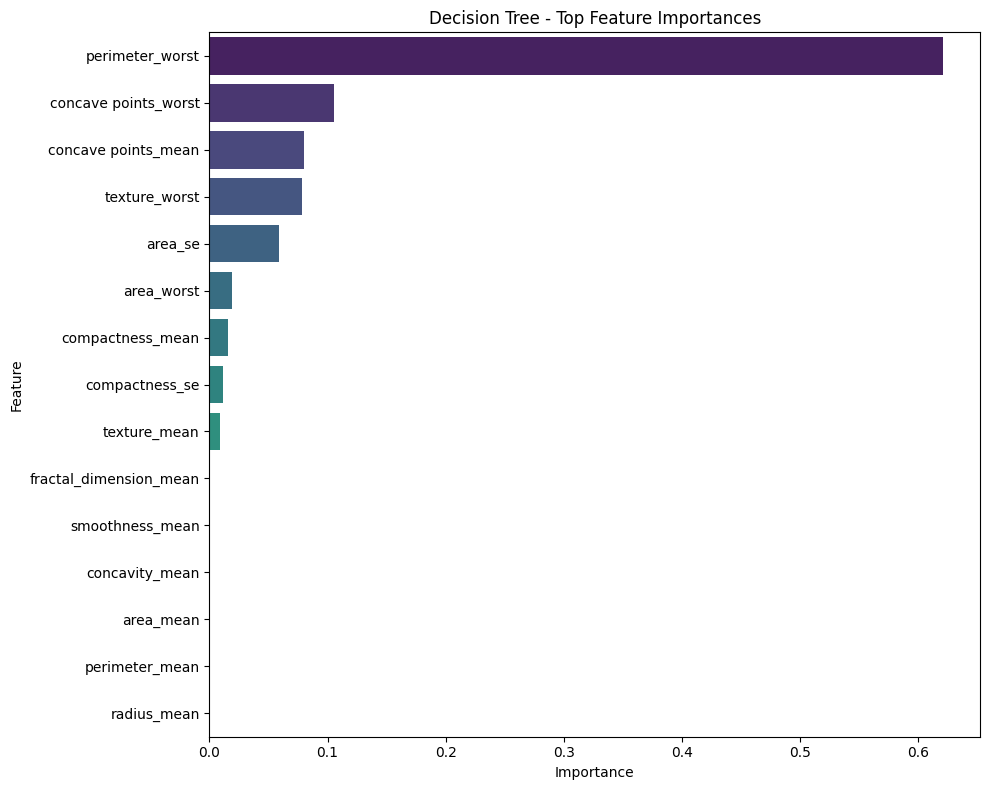

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay)

import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Data Collection
# ----------------------------

df = pd.read_csv('data.csv')

print("First 5 rows:")
print(df.head())
print("\nShape:", df.shape)

# ----------------------------
# 2. Data Preprocessing
# ----------------------------

if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

print("\nMissing values per column:")
print(df.isnull().sum())

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# ----------------------------
# 3. Train–Test Split
# ----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

# ----------------------------
# Baseline Decision Tree
# ----------------------------

dtree_base = DecisionTreeClassifier(random_state=42)
dtree_base.fit(X_train, y_train)
y_pred_base = dtree_base.predict(X_test)
base_acc = accuracy_score(y_test, y_pred_base)
print(f"\nBaseline Decision Tree Accuracy: {base_acc:.4f}")

# ----------------------------
# 4. Hyperparameter Tuning with Grid Search
# ----------------------------

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters (Decision Tree):")
print(grid_search.best_params_)
print(f"Best CV Score: {grid_search.best_score_:.4f}")

best_dt = grid_search.best_estimator_

# ----------------------------
# 5. Model Evaluation
# ----------------------------

y_pred = best_dt.predict(X_test)

print("\n--- Final Decision Tree Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                            target_names=['Benign (0)', 'Malignant (1)']))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Benign (0)', 'Malignant (1)'])

fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap='Blues', ax=ax)
plt.title('Decision Tree - Confusion Matrix')
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Tree Visualization (Top 3 Levels)
# ----------------------------

plt.figure(figsize=(22, 10))
plot_tree(best_dt,
          max_depth=3,
          feature_names=X.columns,
          class_names=['Benign (0)', 'Malignant (1)'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Logic (Top 3 Levels)")
plt.show()

# ----------------------------
# 7. Feature Importance
# ----------------------------

importances = best_dt.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title('Decision Tree - Top Feature Importances')
plt.tight_layout()
plt.show()


First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wor

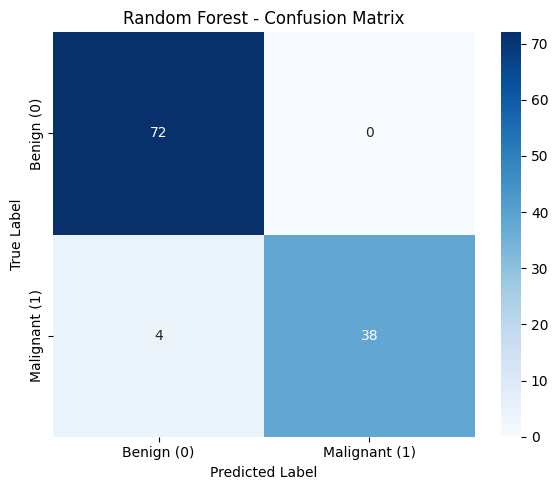

/tmp/ipython-input-2162688064.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')


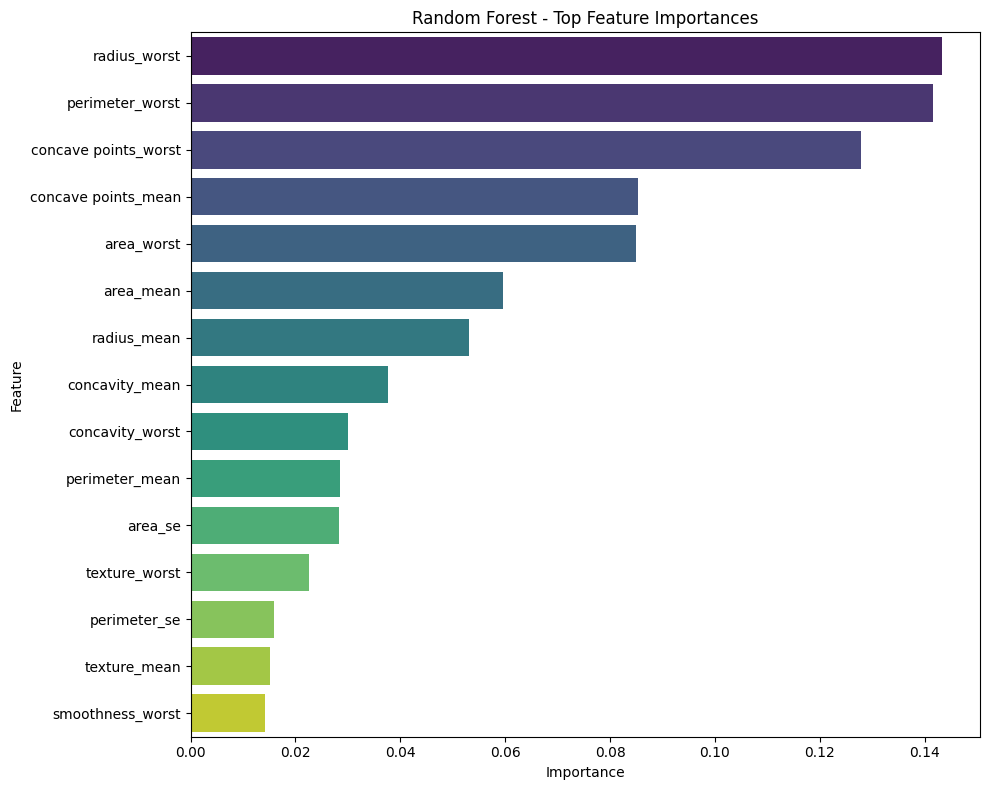

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Data Collection
# ----------------------------

df = pd.read_csv('data.csv')

print("First 5 rows:")
print(df.head())
print("\nShape:", df.shape)

# ----------------------------
# 2. Data Preprocessing
# ----------------------------

if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

print("\nMissing values per column:")
print(df.isnull().sum())

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# ----------------------------
# 3. Train–Test Split
# ----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

# ----------------------------
# 4. Baseline Random Forest
# ----------------------------

rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

y_pred_base = rf_base.predict(X_test)
base_acc = accuracy_score(y_test, y_pred_base)
print(f"\nBaseline Random Forest Accuracy: {base_acc:.4f}")

# ----------------------------
# 5. Hyperparameter Tuning (RandomizedSearchCV)
# ----------------------------

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

print("\nTuning Random Forest (this may take some time)...")

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_

print("\nBest Parameters (Random Forest):")
print(rf_random.best_params_)

# ----------------------------
# 6. Model Evaluation
# ----------------------------

y_pred = best_rf.predict(X_test)

print("\n--- Optimized Random Forest Evaluation ---")
print(f"Tuned Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                            target_names=['Benign (0)', 'Malignant (1)']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ----------------------------
# 7. Feature Importance
# ----------------------------

importances = best_rf.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title('Random Forest - Top Feature Importances')
plt.tight_layout()
plt.show()
